In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

from scipy.misc import derivative
from scipy.misc import electrocardiogram
from scipy.optimize import fmin, brute
from scipy.signal import find_peaks

### Скорость

In [2]:
arr = np.random.rand(1000000)
arr.shape

(1000000,)

In [3]:
%timeit sum(arr)
%timeit np.sum(arr)

%timeit min(arr)
%timeit np.min(arr)

%timeit max(arr)
%timeit np.max(arr)

331 ms ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
548 µs ± 9.38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
201 ms ± 4.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
293 µs ± 9.13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
192 ms ± 4.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
288 µs ± 6.89 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Поиск экстремумов

In [7]:
def f(x):
    return -1 * np.sin(x)/x

In [8]:
def f_(x):
    return -f(x)

### Поиск локальных минимумов

Optimization terminated successfully.
         Current function value: -0.128375
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 19
         Function evaluations: 38


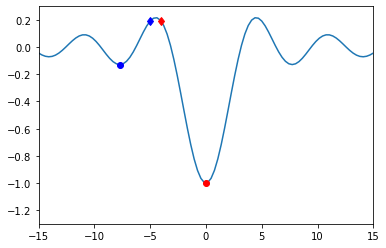

In [9]:
# objective function

x0 = -5 # start from x = -5
xmin0 = fmin(f,x0)

x1 = -4 # start from x = -4
xmin1 = fmin(f,x1)

# plot the function
x = np.linspace(-15,15,100)
y = f(x)
pylab.plot(x,y)
# plot of x0 and the minimum found startin from x0
pylab.plot(x0, f(x0), 'bd', xmin0, f(xmin0), 'bo')
# plot of x1 and the minimum found startin from x1
pylab.plot(x1, f(x1), 'rd', xmin1, f(xmin1), 'ro')

pylab.axis([-15,15,-1.3,0.3])
pylab.show()

### Поиск локальных максимумов

Optimization terminated successfully.
         Current function value: -0.217234
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: -0.217234
         Iterations: 13
         Function evaluations: 26


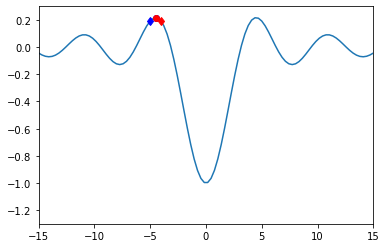

In [10]:
# objective function

x0 = -5 # start from x = -5
xmin0 = fmin(f_,x0)

x1 = -4 # start from x = -4
xmin1 = fmin(f_, x1)

# plot the function
x = np.linspace(-15,15,100)
y = f(x)
pylab.plot(x,y)
# plot of x0 and the minimum found startin from x0
pylab.plot(x0, f(x0), 'bd', xmin0, f(xmin0), 'bo')
# plot of x1 and the minimum found startin from x1
pylab.plot(x1, f(x1), 'rd', xmin1, f(xmin1), 'ro')

pylab.axis([-15,15,-1.3,0.3])
pylab.show()

### Ещё один способ поиска 

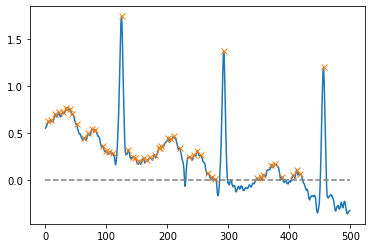

In [11]:
x = electrocardiogram()[3000:3500]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

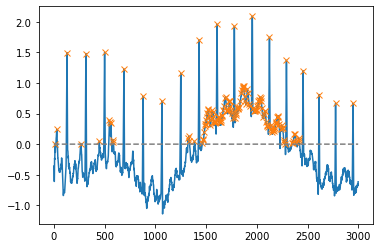

In [12]:
x = electrocardiogram()[1000:4000]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

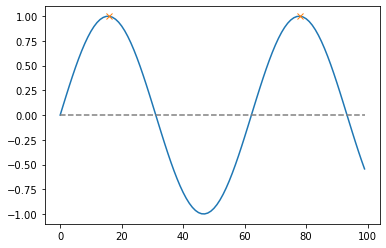

In [13]:
x = np.array([np.sin(xx) for xx in np.linspace(0, 10, 100)])
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

### Производная

In [14]:
from scipy.misc import derivative
def f(x):
    return x**3 + x**2
derivative(f, 1.0, dx=1e-6)

4.999999999921734

In [15]:
def f(x):
    return x ** 2 + 1

In [16]:
x = np.linspace(-10, 10)
fx = f(x)
f1x = [derivative(f, xx, dx=1e-6, n=1) for xx in x]

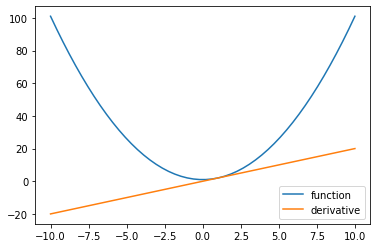

In [17]:
plt.plot(x, fx, label='function')
plt.plot(x, f1x, label='derivative')
plt.legend()
plt.show()